# Dados de casas para alugar no Brasil (2020)

Utilizando do dataset [brazilian_houses_to_rent](https://www.kaggle.com/datasets/rubenssjr/brasilian-houses-to-rent?select=houses_to_rent_v2.csv), quero prever os preços total para aluguel de imóveis utilizando **Regressão Linear**.

Inicialmente estarei utilizando meu conhecimento adquirido até então, e futuramente com novas experiências irei atualizar o notebook. 

## Entendendo o dataset

### Dicionário de dados

* `city`: Cidade onde o imóvel está localizada 
* `area`: Area do imovel
* `rooms`: Número de quartos
* `bathroom`: Número de banheiros
* `parking spaces`: Número de vagas
* `floor`: Andar que o imóvel se encontra
* `animal`: Aceita animais?
* `furniture`: Mobilhada?
* `hoa(R$)`: Valor do condominio
* `rent amount(R$)`: Valor do Aluguel 
* `property tax(R$)`: IPTU
* `fire insurance(R$)`: Seguro de incêncio
* `total(R$)`: Valor total dos custos

### Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Configurações de exibição

pd.set_option("display.max_columns", 100)
pd.set_option("display.max_colwidth", None)

In [3]:
#Configurações de gráficos

sns.set_palette('Accent')
sns.set_style('darkgrid')

#configuração de parametros de exibição de valores fora da notação cientifica
#https://stackoverflow.com/questions/63372647/disable-scientific-notation-and-offset-in-pandas-plot-function

import matplotlib as mpl
mpl.rcParams['axes.formatter.limits'] = (-5,12)

### Carregando e exibindo os dados

In [4]:
dados = pd.read_csv('dataset/houses_to_rent_v2.csv')
dados.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [5]:
print(f'O dataset possui {dados.shape[0]} linhas e {dados.shape[1]} colunas')

O dataset possui 10692 linhas e 13 colunas


### Traduzindo o dataset

In [6]:
dicionario = {
    'city': 'cidade',
    'area': 'area',
    'rooms': 'quartos',
    'bathroom': 'banheiros',
    'parking spaces': 'vagas',
    'floor': 'andar',
    'animal': 'animal',
    'furniture': 'mobilhada',
    'hoa (R$)': 'valor_condominio',
    'rent amount (R$)': 'valor_aluguel',
    'property tax (R$)': 'IPTU',
    'fire insurance (R$)': 'taxa_incendio',
    'total (R$)': 'total',
}

dados = dados.rename(columns = dicionario)
dados.head()

,cidade,area,quartos,banheiros,vagas,andar,animal,mobilhada,valor_condominio,valor_aluguel,IPTU,taxa_incendio,total
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


### Informações e descrições dos dados(Análise Descritiva)

In [7]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   cidade            10692 non-null  object
 1   area              10692 non-null  int64 
 2   quartos           10692 non-null  int64 
 3   banheiros         10692 non-null  int64 
 4   vagas             10692 non-null  int64 
 5   andar             10692 non-null  object
 6   animal            10692 non-null  object
 7   mobilhada         10692 non-null  object
 8   valor_condominio  10692 non-null  int64 
 9   valor_aluguel     10692 non-null  int64 
 10  IPTU              10692 non-null  int64 
 11  taxa_incendio     10692 non-null  int64 
 12  total             10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


Verificar a existência de dados nulos

In [8]:
dados.isnull().sum()

cidade              0
area                0
quartos             0
banheiros           0
vagas               0
andar               0
animal              0
mobilhada           0
valor_condominio    0
valor_aluguel       0
IPTU                0
taxa_incendio       0
total               0
dtype: int64

Verificar existência de dados duplicados

In [9]:
dados.duplicated().value_counts()

False    10334
True       358
dtype: int64

Removendo os dados duplicados

In [10]:
dados.drop_duplicates(inplace = True)
dados.duplicated().value_counts()

False    10334
dtype: int64

Como visto acima, foram excluidos 358 registros duplicados na base de dados

Verificar dados negativos

In [11]:
dados.min()

cidade              Belo Horizonte
area                            11
quartos                          1
banheiros                        1
vagas                            0
andar                            -
animal                       acept
mobilhada                furnished
valor_condominio                 0
valor_aluguel                  450
IPTU                             0
taxa_incendio                    3
total                          499
dtype: object

A coluna **andar** possui valores como '-', nesse caso irei substitui-los por 0;

As colunas **valor_condominio** e **IPTU** possuem valores como 0, Talvez isso possa atrapalhar nossa analise de regressão, por isso irei remover esses registros;

Quantidade de valores com 0 nas colunas **IPTU** e **valor_condominio**

In [12]:
iptu_zero = dados.query('IPTU == 0')['IPTU'].count()
valor_condominio_zero = dados.query('valor_condominio == 0')['valor_condominio'].count()
print(f'A coluna IPTU e valor_condominio possuem respectivamente {iptu_zero} e {valor_condominio_zero} registros com valor 0.')

A coluna IPTU e valor_condominio possuem respectivamente 1480 e 2289 registros com valor 0.


Remoção dos valores com zerados

In [13]:
dados = dados[dados.IPTU > 0]

In [14]:
dados = dados[dados.valor_condominio > 0]

In [15]:
print(f'Após a remoção, o dataset possui {dados.shape[0]} registros')

Após a remoção, o dataset possui 7007 registros


In [16]:
#efetuar a alteração de '-' para '0' e alterar o tipo da coluna 'andar' para int

dados.andar = dados.andar.replace('-', '0').astype('int')
dados.andar.value_counts()

2      768
3      753
1      729
4      617
5      504
6      462
7      432
8      432
9      315
10     306
0      299
11     252
12     216
13     171
14     149
15     127
16      92
17      87
18      63
19      43
20      41
21      40
23      22
22      21
24      16
25      15
26      13
27       7
28       5
29       5
32       2
35       1
301      1
51       1
Name: andar, dtype: int64

Conversão de tipos das colunas **total**, **valor_condominio**, **valor_aluguel**, **IPTU** e **taxa_incendio** para float, que faz mais sentido no contexto dos dados

In [17]:
valores_float = ['total', 'valor_condominio', 'valor_aluguel', 'IPTU', 'taxa_incendio']

for valor in valores_float:
    dados[valor] = dados[valor].astype('float')

In [18]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7007 entries, 0 to 10690
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cidade            7007 non-null   object 
 1   area              7007 non-null   int64  
 2   quartos           7007 non-null   int64  
 3   banheiros         7007 non-null   int64  
 4   vagas             7007 non-null   int64  
 5   andar             7007 non-null   int32  
 6   animal            7007 non-null   object 
 7   mobilhada         7007 non-null   object 
 8   valor_condominio  7007 non-null   float64
 9   valor_aluguel     7007 non-null   float64
 10  IPTU              7007 non-null   float64
 11  taxa_incendio     7007 non-null   float64
 12  total             7007 non-null   float64
dtypes: float64(5), int32(1), int64(4), object(3)
memory usage: 739.0+ KB


Descrição dos dados

In [19]:
descricao = dados.describe().round(2)
descricao.style.background_gradient(cmap = 'crest').format(precision = 2)

,area,quartos,banheiros,vagas,andar,valor_condominio,valor_aluguel,IPTU,taxa_incendio,total
count,7007.00,7007.00,7007.00,7007.00,7007.00,7007.00,7007.00,7007.00,7007.00,7007.00
mean,140.61,2.48,2.22,1.52,6.53,1498.36,3892.93,419.97,50.97,5862.32
std,652.09,1.04,1.31,1.30,6.34,13875.70,3302.49,3805.30,42.94,15095.55
min,11.00,1.00,1.00,0.00,0.00,1.00,450.00,1.00,3.00,499.00
25%,60.00,2.00,1.00,1.00,2.00,480.00,1600.00,69.00,22.00,2304.50
50%,90.00,3.00,2.00,1.00,5.00,855.00,2740.00,160.00,36.00,3938.00
75%,161.00,3.00,3.00,2.00,9.00,1700.00,5000.00,417.00,64.00,7262.00
max,46335.00,9.00,8.00,12.00,301.00,1117000.00,20000.00,313700.00,254.00,1120000.00


Observando a descrições desses dados podemos suspeitar que existem dados discrepantes no dataset, como por exemplo o valor maximo da **area**.

## Identificando Outliers

Outliers são informações fora do padrão dos dados, discrepantes. Podem ocorrer por erros na captura dos dados, na digitação das informações ou apenas alguma exceção nos dados.

Para melhor trabalharmos nossa análise os outliers devem ser removidos. Para isso irei utilizar a abordagem dos Intervalos Interquartis, que

é a diferença entre o terceiro e primeiro quartis: **IIR = Q3−Q1**

In [20]:
#Função para plotagem de gráficos de dispersão dados

def dispersao(data, x, y):
    ax = sns.scatterplot(data = data, x = x, y = y)
    ax.figure.set_size_inches(14, 6)
    ax.set_title(f'Dispersão de Variáveis {x} X {y} ', fontsize = 20)
    ax.set_xlabel(x, fontsize = 16)
    ax.set_ylabel(y, fontsize = 16)
    plt.plot()

In [21]:
#Função para plotagem de boxplot

def box(data, x):
    ax = sns.boxplot(data = data, x = x, orient = 'h', width = 0.5)
    ax.figure.set_size_inches(10, 8)
    ax.set_title(f'Boxplot da variável {x}', fontsize=20)
    ax.set_xlabel(x, fontsize=16)
    plt.plot()

In [22]:
#Função para remover outliers

def remove_outlier(data, variavel, nome_variavel):
    variavel = data[nome_variavel]
    Q1 = variavel.quantile(.25)
    Q3 = variavel.quantile(.75)
    IIQ = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IIQ
    limite_superior = Q3 + 1.5 * IIQ
    selecao = (variavel >= limite_inferior) & (variavel <= limite_superior)
    data = data[selecao]
    box(data, nome_variavel)
    return data

In [23]:
def distribuicao(data, x):
    ax = sns.histplot(data = data, x = x, kde = True, stat = 'density')
    ax.figure.set_size_inches(20, 6)
    ax.set_title(f'Distribuição de Frequências da variável {x}', fontsize=20)
    #ax.set_xlabel('Preço aluguel dos Imóveis (R$)', fontsize=16)
    plt.plot()

#### Variável Total

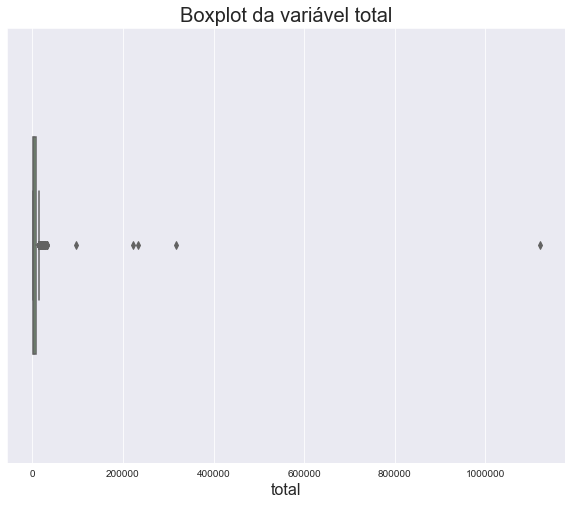

In [24]:
box(dados, 'total')

,area,quartos,banheiros,vagas,andar,valor_condominio,valor_aluguel,IPTU,taxa_incendio,total
count,6550.00,6550.00,6550.00,6550.00,6550.00,6550.00,6550.00,6550.00,6550.00,6550.00
mean,123.64,2.41,2.08,1.38,6.37,1096.18,3274.07,287.96,42.97,4701.23
std,598.96,1.01,1.19,1.17,6.27,905.76,2315.93,401.14,30.19,3229.84
min,11.00,1.00,1.00,0.00,0.00,1.00,450.00,1.00,3.00,499.00
25%,58.00,2.00,1.00,1.00,2.00,450.00,1550.00,66.00,21.00,2221.25
50%,85.00,2.00,2.00,1.00,5.00,800.00,2500.00,142.00,34.00,3676.50
75%,142.00,3.00,3.00,2.00,9.00,1500.00,4200.00,350.00,55.00,6275.00
max,46335.00,9.00,8.00,12.00,301.00,8000.00,13000.00,5404.00,214.00,14680.00


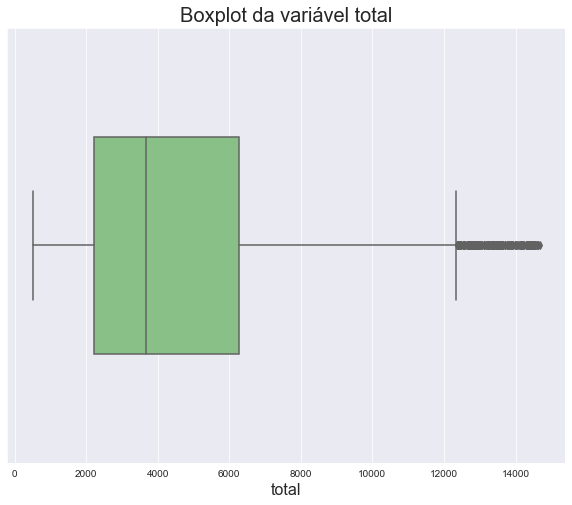

In [25]:
variavel = dados.total.name
dados = remove_outlier(dados, variavel, variavel)
descricao = dados.describe()
descricao.style.background_gradient(cmap = 'crest').format(precision = 2)

#### Variável Valor Aluguel

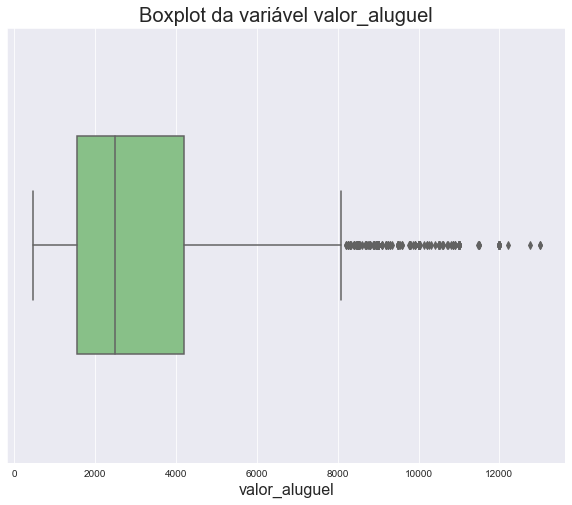

In [26]:
box(dados, 'valor_aluguel')

,area,quartos,banheiros,vagas,andar,valor_condominio,valor_aluguel,IPTU,taxa_incendio,total
count,6227.00,6227.00,6227.00,6227.00,6227.00,6227.00,6227.00,6227.00,6227.00,6227.00
mean,111.35,2.36,2.01,1.32,6.26,1044.55,2942.60,268.17,38.67,4294.00
std,182.18,0.99,1.14,1.14,6.25,876.52,1831.94,389.46,23.75,2742.91
min,11.00,1.00,1.00,0.00,0.00,1.00,450.00,1.00,3.00,499.00
25%,57.00,2.00,1.00,1.00,2.00,450.00,1500.00,63.00,20.00,2160.00
50%,81.00,2.00,2.00,1.00,5.00,754.00,2500.00,132.00,32.00,3498.00
75%,135.00,3.00,2.50,2.00,9.00,1365.00,3973.50,311.50,51.00,5753.00
max,12732.00,7.00,7.00,12.00,301.00,8000.00,8090.00,5404.00,143.00,14640.00


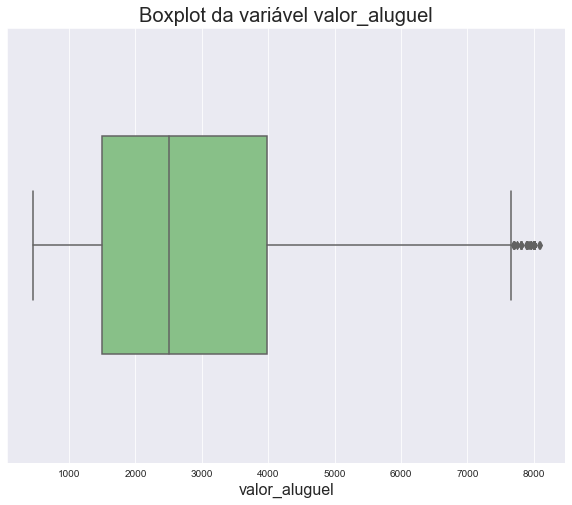

In [27]:
variavel = dados.valor_aluguel.name
dados = remove_outlier(dados, variavel, variavel)
descricao = dados.describe()
descricao.style.background_gradient(cmap = 'crest').format(precision = 2)

#### Variável Área

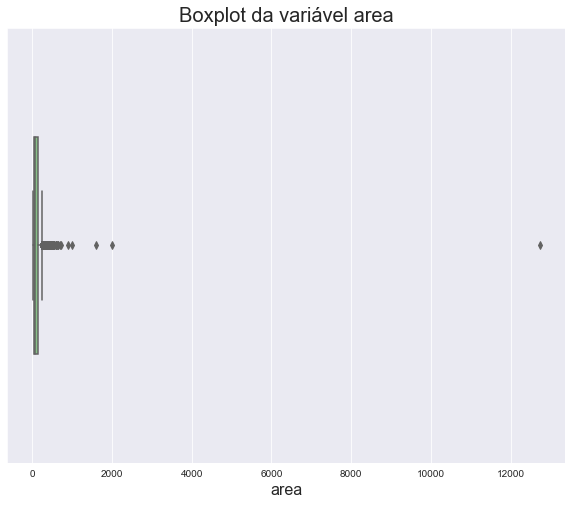

In [28]:
box(dados, 'area')

,area,quartos,banheiros,vagas,andar,valor_condominio,valor_aluguel,IPTU,taxa_incendio,total
count,5839.00,5839.00,5839.00,5839.00,5839.00,5839.00,5839.00,5839.00,5839.00,5839.00
mean,93.47,2.27,1.87,1.21,6.25,939.38,2787.73,218.39,36.56,3982.06
std,52.44,0.93,0.98,0.99,6.30,707.21,1727.43,287.59,22.14,2441.43
min,11.00,1.00,1.00,0.00,0.00,1.00,450.00,1.00,3.00,499.00
25%,55.00,2.00,1.00,1.00,2.00,440.00,1490.00,59.00,20.00,2083.00
50%,78.00,2.00,2.00,1.00,5.00,720.00,2308.00,122.00,31.00,3322.00
75%,120.00,3.00,2.00,2.00,9.00,1250.50,3600.00,266.00,47.00,5234.50
max,252.00,7.00,7.00,6.00,301.00,8000.00,8090.00,5404.00,121.00,13490.00


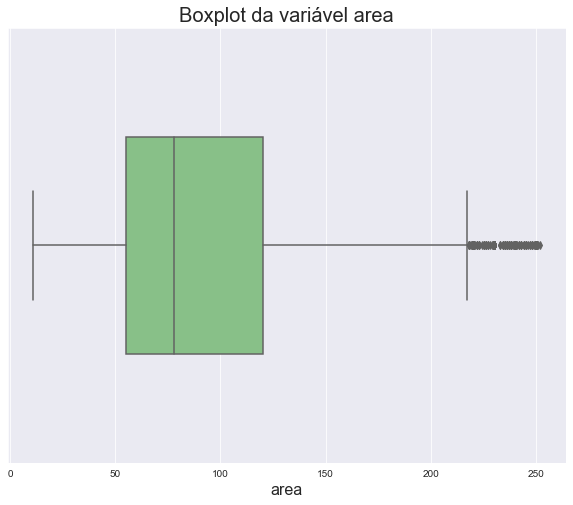

In [29]:
variavel = dados.area.name
dados = remove_outlier(dados, variavel, variavel)
descricao = dados.describe()
descricao.style.background_gradient(cmap = 'crest').format(precision = 2)

#### Variável Andar

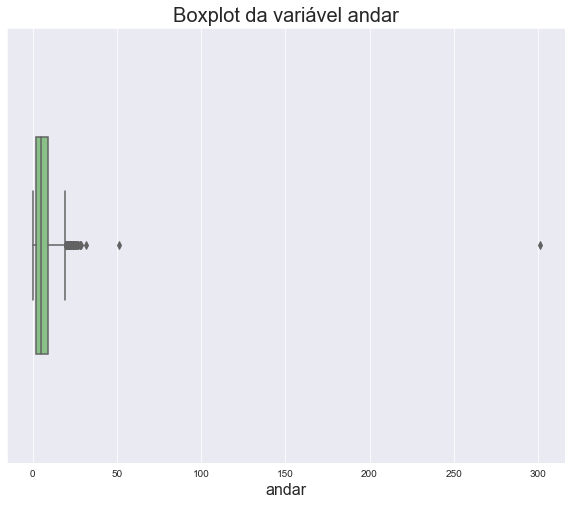

In [30]:
box(dados, 'andar')

Acredito que possa ter ocorrido algum erro de digitação, como podemos ver abaixo, existe um registro com valor 301, este será removido

In [31]:
dados.andar.unique()

array([  7,   2,   4,  10,  11,  24,   1,   9,  17,  18,   5,   6,   3,
        13,  15,   8,  20,  14,  26,   0,  16,  21,  12,  19,  22,  27,
        23,  25,  28,  29, 301,  51,  32])

In [32]:
dados = dados[dados['andar'] != 301]
dados.andar.unique()


array([ 7,  2,  4, 10, 11, 24,  1,  9, 17, 18,  5,  6,  3, 13, 15,  8, 20,
       14, 26,  0, 16, 21, 12, 19, 22, 27, 23, 25, 28, 29, 51, 32])

,area,quartos,banheiros,vagas,andar,valor_condominio,valor_aluguel,IPTU,taxa_incendio,total
count,5838.00,5838.00,5838.00,5838.00,5838.00,5838.00,5838.00,5838.00,5838.00,5838.00
mean,93.48,2.27,1.87,1.21,6.20,939.41,2787.76,218.40,36.56,3982.14
std,52.45,0.93,0.98,0.99,4.98,707.26,1727.58,287.61,22.15,2441.63
min,11.00,1.00,1.00,0.00,0.00,1.00,450.00,1.00,3.00,499.00
25%,55.00,2.00,1.00,1.00,2.00,440.00,1490.00,59.00,20.00,2083.00
50%,78.00,2.00,2.00,1.00,5.00,720.00,2304.00,122.00,31.00,3321.00
75%,120.00,3.00,2.00,2.00,9.00,1250.75,3600.00,266.00,47.00,5234.75
max,252.00,7.00,7.00,6.00,51.00,8000.00,8090.00,5404.00,121.00,13490.00


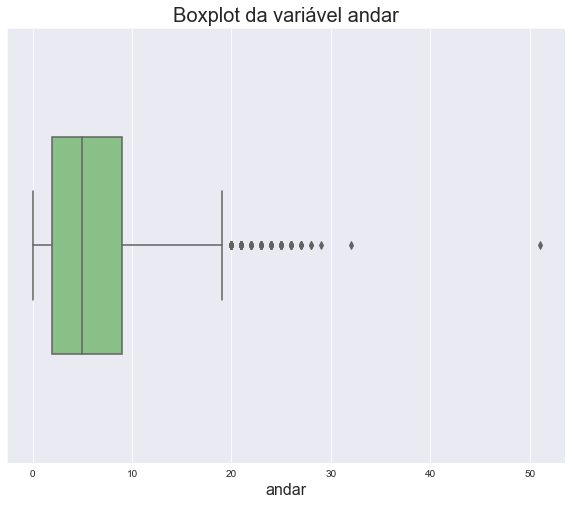

In [33]:
box(dados, 'andar')
descricao = dados.describe()
descricao.style.background_gradient(cmap = 'crest').format(precision = 2)

#### Variável Valor Condomínio

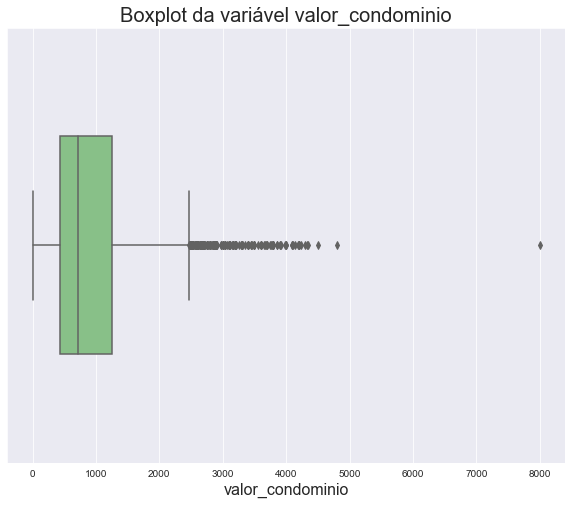

In [34]:
box(dados, 'valor_condominio')

,area,quartos,banheiros,vagas,andar,valor_condominio,valor_aluguel,IPTU,taxa_incendio,total
count,5586.00,5586.00,5586.00,5586.00,5586.00,5586.00,5586.00,5586.00,5586.00,5586.00
mean,89.07,2.22,1.80,1.14,6.16,844.94,2681.67,189.48,35.24,3751.34
std,48.07,0.92,0.92,0.93,4.99,547.74,1645.89,235.99,21.16,2192.62
min,11.00,1.00,1.00,0.00,0.00,1.00,450.00,1.00,3.00,499.00
25%,54.00,1.00,1.00,0.25,2.00,420.00,1420.00,59.00,19.00,2029.25
50%,75.00,2.00,2.00,1.00,5.00,700.00,2280.00,114.00,30.00,3193.50
75%,113.00,3.00,2.00,2.00,9.00,1159.75,3500.00,245.00,45.00,4925.50
max,252.00,7.00,7.00,6.00,51.00,2460.00,8090.00,4565.00,121.00,12800.00


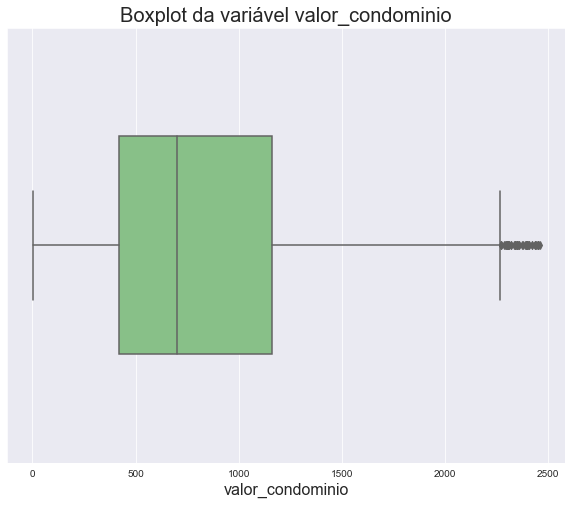

In [35]:
variavel = dados.valor_condominio.name
dados = remove_outlier(dados, variavel, variavel)
descricao = dados.describe()
descricao.style.background_gradient(cmap = 'crest').format(precision = 2)

#### Variável IPTU

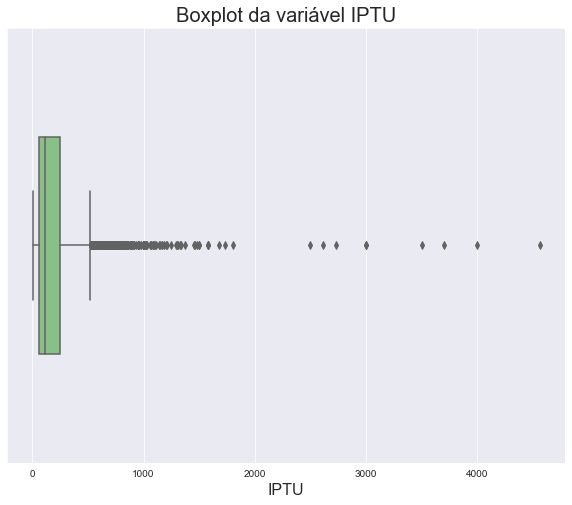

In [36]:
box(dados, 'IPTU')

,area,quartos,banheiros,vagas,andar,valor_condominio,valor_aluguel,IPTU,taxa_incendio,total
count,5211.00,5211.00,5211.00,5211.00,5211.00,5211.00,5211.00,5211.00,5211.00,5211.00
mean,83.36,2.15,1.69,1.04,6.05,779.54,2526.26,144.76,33.29,3483.86
std,43.14,0.88,0.81,0.82,4.94,492.12,1518.52,120.54,19.58,1946.88
min,11.00,1.00,1.00,0.00,0.00,1.00,450.00,1.00,3.00,499.00
25%,52.00,1.00,1.00,0.00,2.00,400.00,1398.00,54.00,19.00,1966.50
50%,72.00,2.00,2.00,1.00,5.00,658.00,2200.00,100.00,28.00,3021.00
75%,102.00,3.00,2.00,2.00,9.00,1040.00,3299.00,209.00,42.00,4527.50
max,252.00,7.00,7.00,5.00,51.00,2450.00,8090.00,522.00,121.00,10620.00


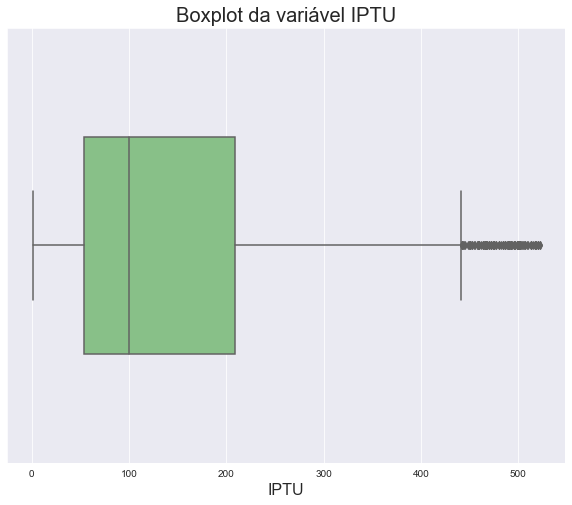

In [37]:
variavel = dados.IPTU.name
dados = remove_outlier(dados, variavel, variavel)
descricao = dados.describe()
descricao.style.background_gradient(cmap = 'crest').format(precision = 2)

In [38]:
descricao = dados.describe()
descricao.style.background_gradient(cmap = 'crest').format(precision = 2)

,area,quartos,banheiros,vagas,andar,valor_condominio,valor_aluguel,IPTU,taxa_incendio,total
count,5211.00,5211.00,5211.00,5211.00,5211.00,5211.00,5211.00,5211.00,5211.00,5211.00
mean,83.36,2.15,1.69,1.04,6.05,779.54,2526.26,144.76,33.29,3483.86
std,43.14,0.88,0.81,0.82,4.94,492.12,1518.52,120.54,19.58,1946.88
min,11.00,1.00,1.00,0.00,0.00,1.00,450.00,1.00,3.00,499.00
25%,52.00,1.00,1.00,0.00,2.00,400.00,1398.00,54.00,19.00,1966.50
50%,72.00,2.00,2.00,1.00,5.00,658.00,2200.00,100.00,28.00,3021.00
75%,102.00,3.00,2.00,2.00,9.00,1040.00,3299.00,209.00,42.00,4527.50
max,252.00,7.00,7.00,5.00,51.00,2450.00,8090.00,522.00,121.00,10620.00


[]

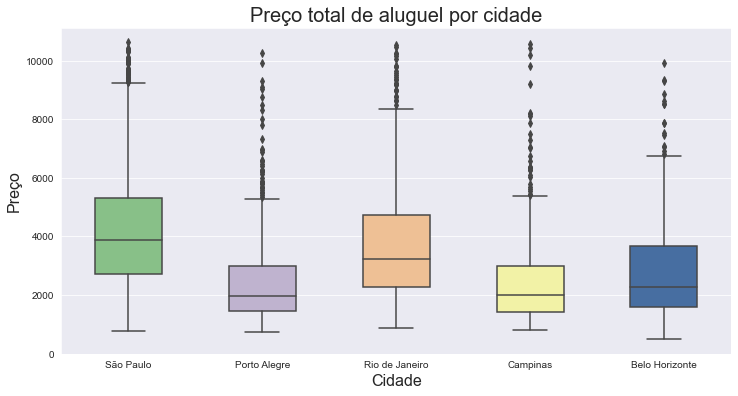

In [39]:
ax = sns.boxplot(x = 'cidade', y = 'total', data = dados, orient = 'v', width = 0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Preço total de aluguel por cidade', fontsize=20)
ax.set_ylabel('Preço', fontsize=16)
ax.set_xlabel('Cidade', fontsize = 16)
plt.plot()

### Matriz de correlação

In [40]:
dados.corr()['total'].sort_values(ascending = False)

total               1.000000
valor_aluguel       0.971863
taxa_incendio       0.957032
valor_condominio    0.752287
IPTU                0.681304
area                0.550250
banheiros           0.509160
vagas               0.394265
quartos             0.338499
andar               0.221989
Name: total, dtype: float64

## Mapa de Calor

No mapa de calor podemos ter uma visão melhor da correlação entre as varáveis, os possíveis valores de correlação são entre -1 e 1.

Onde valores próximos de -1 indicam uma forte correlação negativa, que significa que, quando uma variável aumenta seu valor, a outra diminui.

No caso do valores perto de 1 nos diz que existe uma forte correlação positiva, na qual quando um valor da variavel aumenta a outra também aumenta ou quando diminui, a outra também diminui.

Se o valor é próximo a 0, significa que não existe grande correlação entre as variáveis.

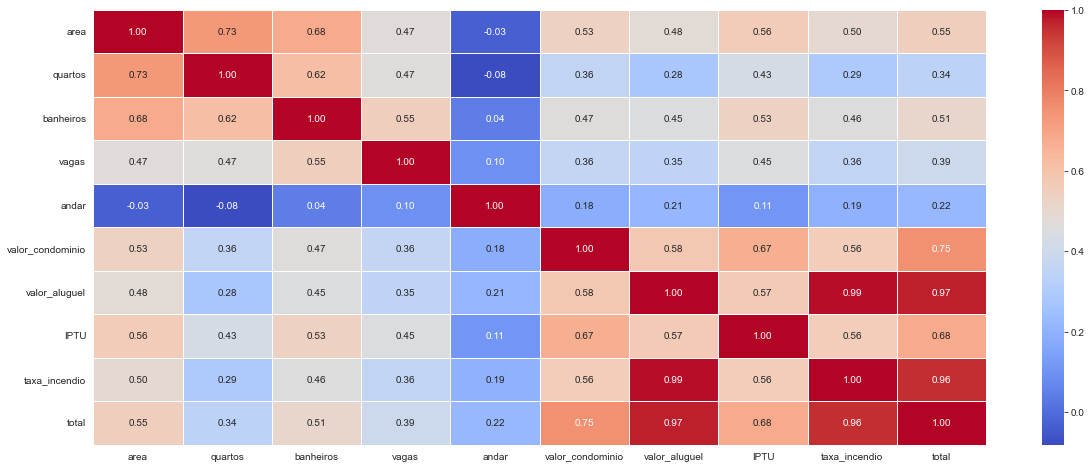

In [41]:
# Plotando o heatmap

plt.figure(figsize=(20,8))
sns.heatmap(dados.corr(), annot = True, linewidths = .5, fmt = '.2f', cmap = 'coolwarm')
plt.show()

Observando o mapa de calor, podemos notar que a variável dependente(total) e as variáveis explicativas valor_aluguel e taxa_incendio possuem uma forte correlação positiva;

Através de outros testes iremos investigar se estas são as melhores variáveis para criar o modelo de regressão.

### Verificação gráfica das variáveis

### Boxplot da variável depedente

[]

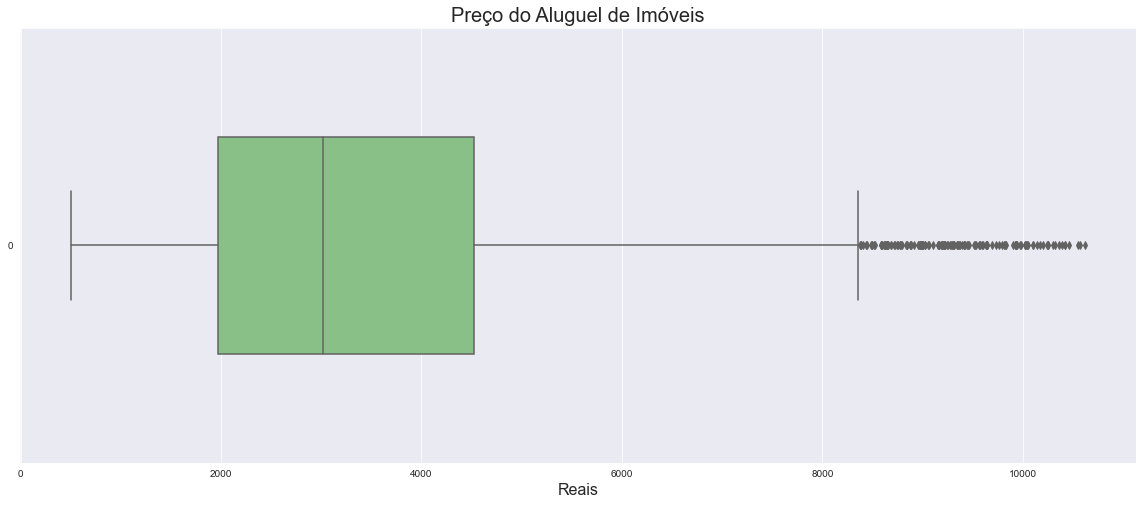

In [42]:
ax = sns.boxplot(data = dados['total'], orient = 'h', width = 0.5)
ax.figure.set_size_inches(20, 8)
ax.set_title('Preço do Aluguel de Imóveis', fontsize=20)
ax.set_xlabel('Reais', fontsize=16)
plt.plot()

### Distribuição da variável dependente

[]

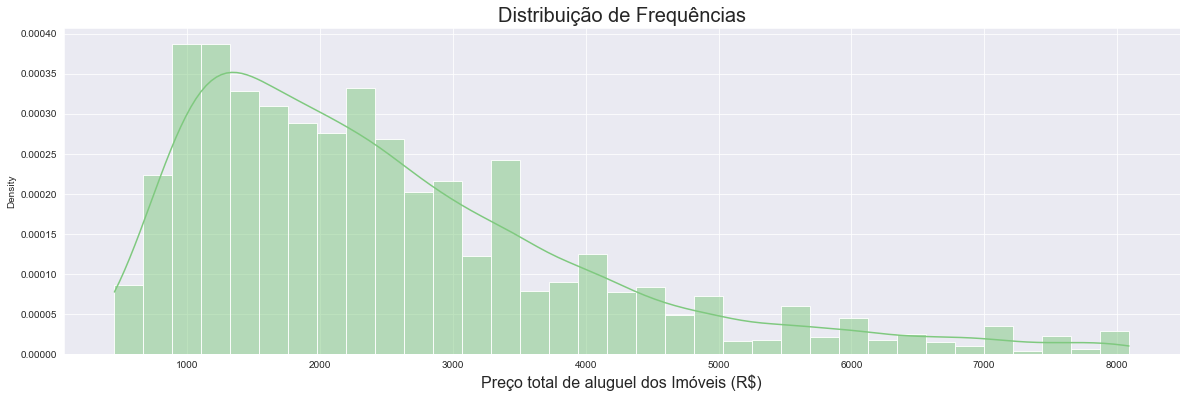

In [43]:
ax = sns.histplot(data = dados, x = 'valor_aluguel', kde = True, stat = 'density')
ax.figure.set_size_inches(20, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_xlabel('Preço total de aluguel dos Imóveis (R$)', fontsize=16)
plt.plot()

A distribuição da variável possui assimetria a direita, isso quer dizer que grande quandidade dos imoveis do dataset estão concentrados nos valores menores de aluguel, enquanto poucos são de alto valor.

### Dispersão entre variáveis

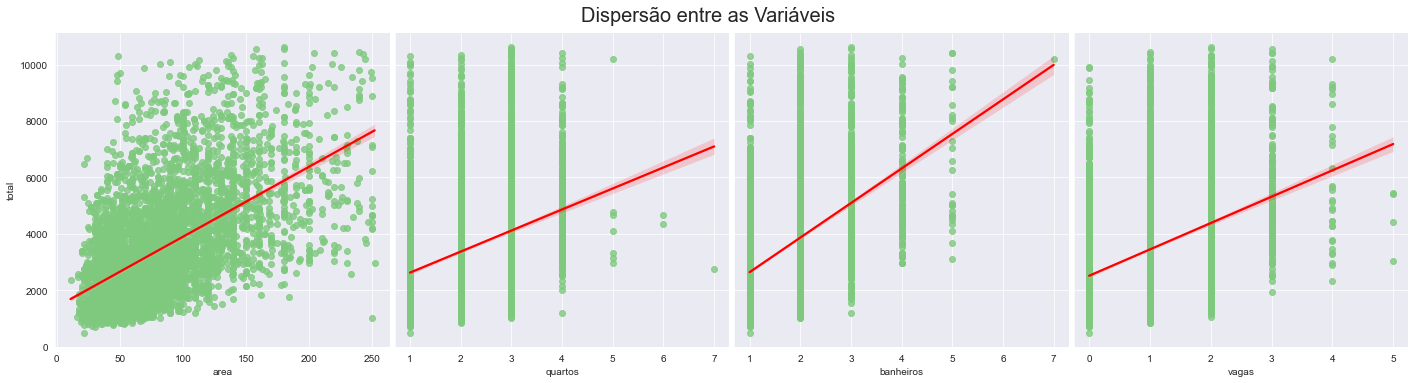

In [44]:
ax = sns.pairplot(dados, y_vars = 'total', x_vars = ['area', 'quartos', 'banheiros', 'vagas'], 
                  height = 5, kind = 'reg', plot_kws={'line_kws':{'color':'red'}})
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

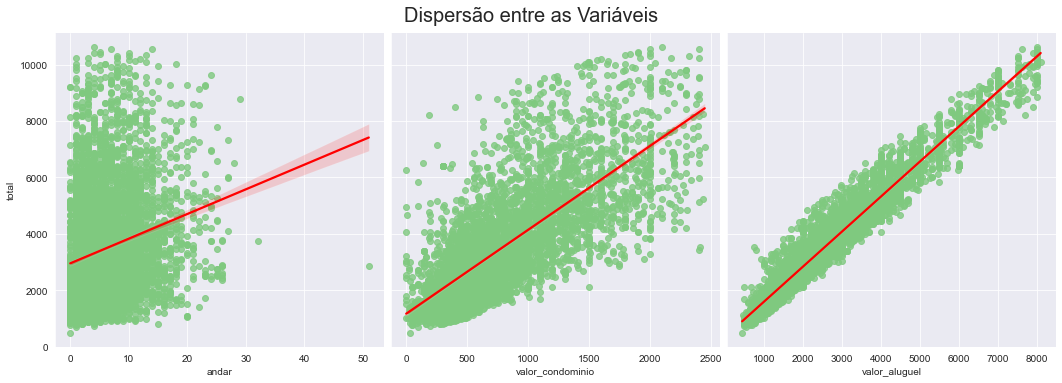

In [45]:
ax = sns.pairplot(dados, y_vars = 'total', x_vars = ['andar', 'valor_condominio', 'valor_aluguel'], 
                  height = 5, kind = 'reg', plot_kws={'line_kws':{'color':'red'}})
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

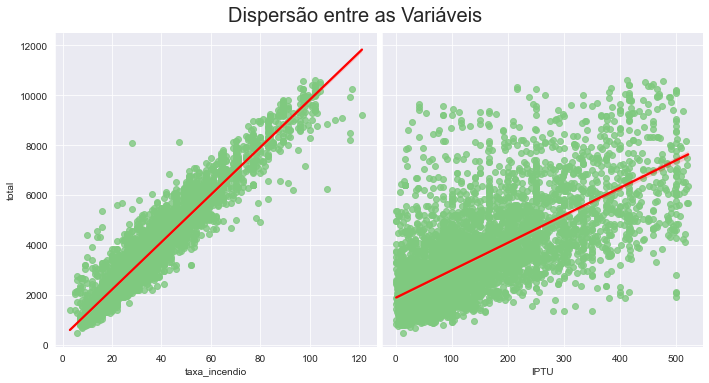

In [46]:
ax = sns.pairplot(dados, y_vars = 'total', x_vars = ['taxa_incendio', 'IPTU'], 
                  height = 5, kind = 'reg', plot_kws={'line_kws':{'color':'red'}})
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

Com as vizualizações podemos perceber a relação da variável dependente com as explicativas, alguma são bem fortes, como valor_condominio por exemplo 

### Encoding das variáveis categóricas

Será utilizado o método 'One-Hot-Enconding' para o encoding, pois com ele não criamos uma hierarquia.

In [47]:
categoria = ['cidade']
dados = pd.get_dummies(data = dados, columns = categoria)
dados.head()  

,area,quartos,banheiros,vagas,andar,animal,mobilhada,valor_condominio,valor_aluguel,IPTU,taxa_incendio,total,cidade_Belo Horizonte,cidade_Campinas,cidade_Porto Alegre,cidade_Rio de Janeiro,cidade_São Paulo
0,70,2,1,1,7,acept,furnished,2065.0,3300.0,211.0,42.0,5618.0,0,0,0,0,1
3,51,2,1,0,2,acept,not furnished,270.0,1112.0,22.0,17.0,1421.0,0,0,1,0,0
6,72,2,1,0,7,acept,not furnished,740.0,1900.0,85.0,25.0,2750.0,0,0,0,1,0
9,35,1,1,0,2,acept,furnished,590.0,2300.0,35.0,30.0,2955.0,0,0,0,1,0
10,26,1,1,0,2,acept,furnished,470.0,2100.0,150.0,27.0,2747.0,0,0,0,0,1


In [48]:
# Feita a alteração, onde o 'not acept' foi substituido por 0, e 'acept' por 1 na coluna 'animal'

for animal in 'animal':
    dados['animal'] = dados['animal'].replace({'not acept': 0, 'acept': 1})
    
# Feita a alteração, onde o 'not furnished' foi substituido por 0, e 'furnished' por 1 na coluna 'mobilhada'    
for mobilhada in 'mobilhada':
    dados['mobilhada'] = dados['mobilhada'].replace({'not furnished': 0, 'furnished': 1})    

dados.head(10)

,area,quartos,banheiros,vagas,andar,animal,mobilhada,valor_condominio,valor_aluguel,IPTU,taxa_incendio,total,cidade_Belo Horizonte,cidade_Campinas,cidade_Porto Alegre,cidade_Rio de Janeiro,cidade_São Paulo
0,70,2,1,1,7,1,1,2065.0,3300.0,211.0,42.0,5618.0,0,0,0,0,1
3,51,2,1,0,2,1,0,270.0,1112.0,22.0,17.0,1421.0,0,0,1,0,0
6,72,2,1,0,7,1,0,740.0,1900.0,85.0,25.0,2750.0,0,0,0,1,0
9,35,1,1,0,2,1,1,590.0,2300.0,35.0,30.0,2955.0,0,0,0,1,0
10,26,1,1,0,2,1,1,470.0,2100.0,150.0,27.0,2747.0,0,0,0,0,1
11,46,1,1,1,10,1,0,550.0,580.0,43.0,8.0,1181.0,0,1,0,0,0
12,36,1,1,0,11,1,0,359.0,2100.0,70.0,27.0,2556.0,0,0,0,0,1
13,55,1,1,1,2,1,1,790.0,4200.0,224.0,54.0,5268.0,0,0,0,0,1
14,100,2,2,2,24,1,1,900.0,4370.0,17.0,56.0,5343.0,0,0,0,0,1
16,110,2,2,1,1,1,0,700.0,3000.0,122.0,39.0,3861.0,0,0,0,0,1


## Regressão Linear

Para previsão do valor total, será utilizada a Regressão Linear.

### Criando os dataset de treino e teste 

Para criação do modelo os dados serão separados em dados de treino e dados de teste;

Serão criados 2 datasets, um com as variaveis explicativas e outro com a dependente

In [49]:
# Importando biblioteca responsável por fazer a separação dos dados de treino e teste

from sklearn.model_selection import train_test_split

SEED = 25 # Valor para aleatoriedade

### Estimando o modelo utilizando a biblioteca do *scikit-learn*

Importando bibliotecas da Regressão linear a das metricas do scikit-learn

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [51]:
#Estanciando o objeto LinearRegression

modelo = LinearRegression()

In [52]:
dados.head()

,area,quartos,banheiros,vagas,andar,animal,mobilhada,valor_condominio,valor_aluguel,IPTU,taxa_incendio,total,cidade_Belo Horizonte,cidade_Campinas,cidade_Porto Alegre,cidade_Rio de Janeiro,cidade_São Paulo
0,70,2,1,1,7,1,1,2065.0,3300.0,211.0,42.0,5618.0,0,0,0,0,1
3,51,2,1,0,2,1,0,270.0,1112.0,22.0,17.0,1421.0,0,0,1,0,0
6,72,2,1,0,7,1,0,740.0,1900.0,85.0,25.0,2750.0,0,0,0,1,0
9,35,1,1,0,2,1,1,590.0,2300.0,35.0,30.0,2955.0,0,0,0,1,0
10,26,1,1,0,2,1,1,470.0,2100.0,150.0,27.0,2747.0,0,0,0,0,1


Para compor a regressão, irei remover as colunas **valor_aluguel**, **taxa_incendio**, **IPTU**, **valor_condominio**, pois essas somadas são os valores da coluna **total** que será nosso alvo.

In [53]:
X = dados.drop(['total', 'valor_aluguel', 'taxa_incendio', 'IPTU', 'valor_condominio'], axis = 'columns')
y = dados['total']

In [54]:
X

,area,quartos,banheiros,vagas,andar,animal,mobilhada,cidade_Belo Horizonte,cidade_Campinas,cidade_Porto Alegre,cidade_Rio de Janeiro,cidade_São Paulo
0,70,2,1,1,7,1,1,0,0,0,0,1
3,51,2,1,0,2,1,0,0,0,1,0,0
6,72,2,1,0,7,1,0,0,0,0,1,0
9,35,1,1,0,2,1,1,0,0,0,1,0
10,26,1,1,0,2,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10682,160,3,2,3,4,1,1,0,0,1,0,0
10684,98,2,1,0,1,1,0,0,0,0,1,0
10685,83,3,2,2,11,1,0,0,0,0,0,1
10687,63,2,1,1,5,0,1,0,0,1,0,0


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = SEED)

In [56]:
# Treinando o objeto modelo com os dados de treino

modelo.fit(X_train, y_train)

LinearRegression()

Determinar o coeficiente de determinação R² dos dados de treino, este que diz o quanto a linha de regressão se ajusta aos dados. Seus valores estão entre 0 e 1.

Quanto maior o valor de R², melhor o modelo se ajusta aos seus dados

In [57]:
print(f'O coeficiente de determinação R² é {modelo.score(X_train, y_train).round(2)}')

O coeficiente de determinação R² é 0.56


Gerando previssões para os dados de teste(X_test)

In [58]:
y_pred = modelo.predict(X_test)

Determinar o coeficiente de determinação R² para as previsões do modelo

In [59]:
print(f'O coeficiente de determinação R² é {metrics.r2_score(y_test, y_pred).round(2)}')

O coeficiente de determinação R² é 0.58


#### Metricas

Serão utilizadas, além do R² visto anteriormente, as métricas:

EQM = Erro Quadrado Médio, que consiste na média dos erros ao quadrado, valores baixos indicam modelos melhores.

REQM = Raiz do Erro Quadrado Médio, corrige a unidade do erro o EQM, uma vez que esse eleva o erro ao quadrado. Valores baixos indicam modelos melhores.

MAPE = Erro Percentual Absoluto Médio, exibe a porcentagem de erro do modelo.

In [60]:
EQM = metrics.mean_squared_error(y_test, y_pred).round(2)
REQM = np.sqrt(metrics.mean_squared_error(y_test, y_pred)).round(2)
R2 = metrics.r2_score(y_test, y_pred).round(2)
MAPE = metrics.mean_absolute_percentage_error(y_test, y_pred).round(2)
pd.DataFrame([EQM, REQM, R2, MAPE], ['EQM', 'REQM', 'R²', 'MAPE'], columns=['Métricas'])

,Métricas
EQM,1594313.09
REQM,1262.66
R²,0.58
MAPE,0.29


### Previsões pontuais

In [61]:
entrada = X_test[0:1]
entrada

,area,quartos,banheiros,vagas,andar,animal,mobilhada,cidade_Belo Horizonte,cidade_Campinas,cidade_Porto Alegre,cidade_Rio de Janeiro,cidade_São Paulo
3510,65,2,2,1,4,1,0,0,0,0,0,1


In [62]:
ent = y_test[0:1]
ent

3510    2450.0
Name: total, dtype: float64

In [63]:
modelo.predict(entrada)[0]

3390.730222475816

### Gráfico de dispersão entre valor estimado e valor real

In [64]:
y_previsto_train = modelo.predict(X_train)

In [65]:
residuo = y_train - y_previsto_train

<AxesSubplot:title={'center':'Previsão X Real'}, xlabel='Preço - Previsão', ylabel='Preço - Real'>

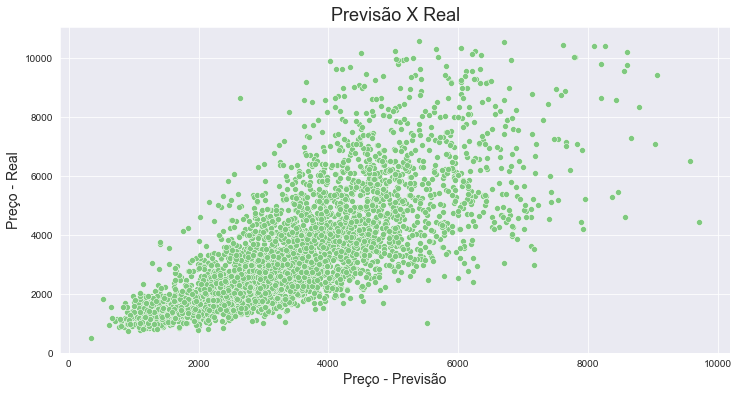

In [66]:
ax = sns.scatterplot(x=y_previsto_train, y=y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('Preço - Previsão', fontsize=14)
ax.set_ylabel('Preço - Real', fontsize=14)
ax

<AxesSubplot:title={'center':'Distribuição de Frequências dos Resíduos'}, xlabel='Preço', ylabel='Density'>

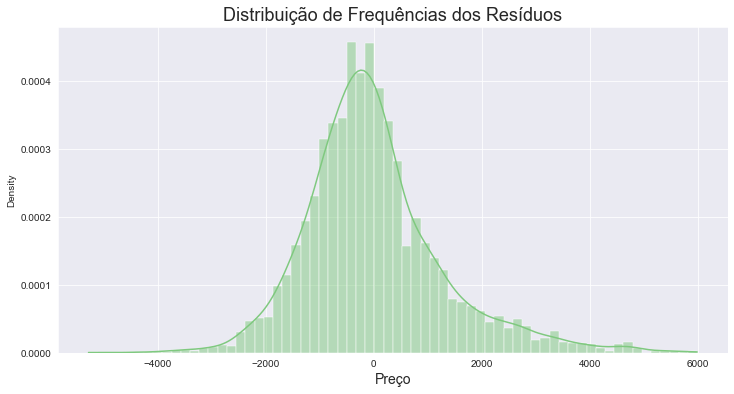

In [67]:
ax = sns.histplot(data = residuo, kde = True, stat = 'density')
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências dos Resíduos', fontsize=18)
ax.set_xlabel('Preço', fontsize=14)
ax

### Conclusão - construção